## Implementing Sensitivity Analysis
To effectively perform these sensitivity analyses, the following steps can be taken:

- 1. Define Key Parameters: 
   Identify which parameters (e.g., distances, commodity volumes, emission factors) are most critical to the optimization.

- 2. Develop Scenarios: 
   Create different scenarios by varying these parameters within realistic ranges.

- 3. Re-optimize Routes: 
    For each scenario, re-run the optimization model to determine how the optimal routes change.

- 4. Analyze Results: 
   Compare the outcomes across scenarios to identify which parameters have the most significant impact on route efficiency and CO₂ emissions.

- 5. Make Informed Decisions: 
   Use the insights gained to make robust, flexible shipment plans that can adapt to potential changes and uncertainties.

## Key parameters

we consider the Addition or Removal of Destinations: Investigate how introducing new  countries or eliminating existing ones impacts the optimal shipment routes.

##  Create Scenarios:
1. introducing a new country in South America, such as the Falkland Islands into the plan 
2.remove an existing country fromt the plan, for instance, Vietnam

### Scenario 1 a new country in South America, such as the Falkland Islands join the plan


In [1]:
from util import optimizer_case_1, plot, plot_on_map, optimizer_case2_JFK_based, optimizer_case2_LAX_based
import pandas as pd

data = pd.read_csv('airports.csv')
# Add one to the first column value
new_airport = pd.DataFrame({
    'Unnamed: 0': [data['Unnamed: 0'].max() + 1],
    'country': ['Falkland Islands'],
    'airport_name': ['Port Stanley Airport'],
    'airport_code': ['PSY'],
    'latitude': ['51°41′10″S'],
    'longitude': ['57°46′39″W'],
    'latitude_deg': [-51.686111],
    'longitude_deg': [-57.7775]
})

data = pd.concat([data, new_airport], ignore_index=True)

data['Unnamed: 0'] = data['Unnamed: 0'] + 1
optimized_edges,G=optimizer_case_1(data)

case2_JFK_edges,G=optimizer_case2_JFK_based(data)
case2_LAX_edges,G=optimizer_case2_LAX_based(data)


Set parameter Username
Academic license - for non-commercial use only - expires 2025-09-09
Set parameter MIPGap to value 0.08
Gurobi Optimizer version 11.0.0 build v11.0.0rc2 (win64 - Windows 11+.0 (22631.2))

CPU model: 11th Gen Intel(R) Core(TM) i7-11800H @ 2.30GHz, instruction set [SSE2|AVX|AVX2|AVX512]
Thread count: 8 physical cores, 16 logical processors, using up to 16 threads

Optimize a model with 4146 rows, 4232 columns and 27906 nonzeros
Model fingerprint: 0x6d11569e
Variable types: 92 continuous, 4140 integer (4140 binary)
Coefficient statistics:
  Matrix range     [1e+00, 5e+01]
  Objective range  [6e+01, 1e+04]
  Bounds range     [1e+00, 5e+01]
  RHS range        [1e+00, 5e+01]
Presolve removed 182 rows and 184 columns
Presolve time: 0.03s
Presolved: 3964 rows, 4048 columns, 27016 nonzeros
Variable types: 88 continuous, 3960 integer (3960 binary)
Found heuristic solution: objective 156433.12084

Root relaxation: objective 3.462951e+04, 143 iterations, 0.00 seconds (0.00 wo

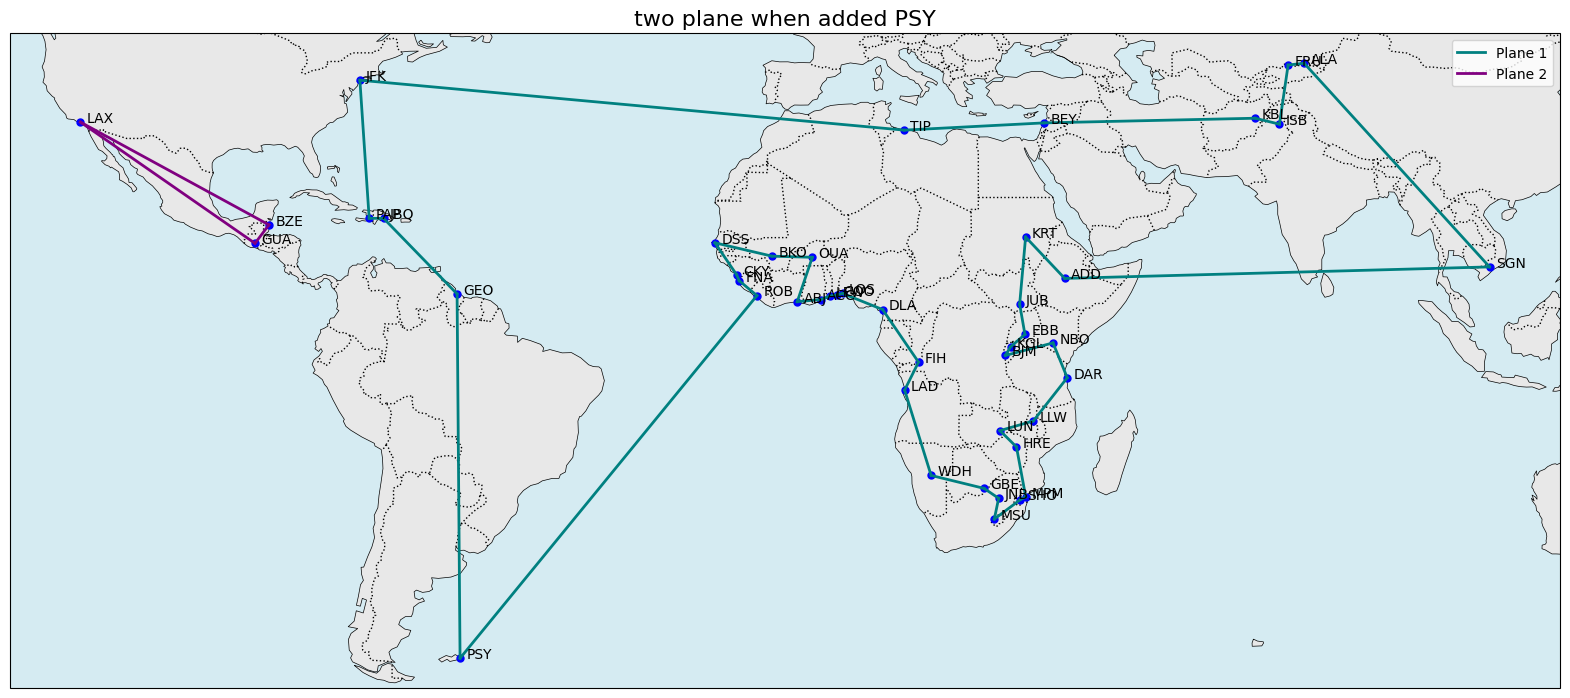

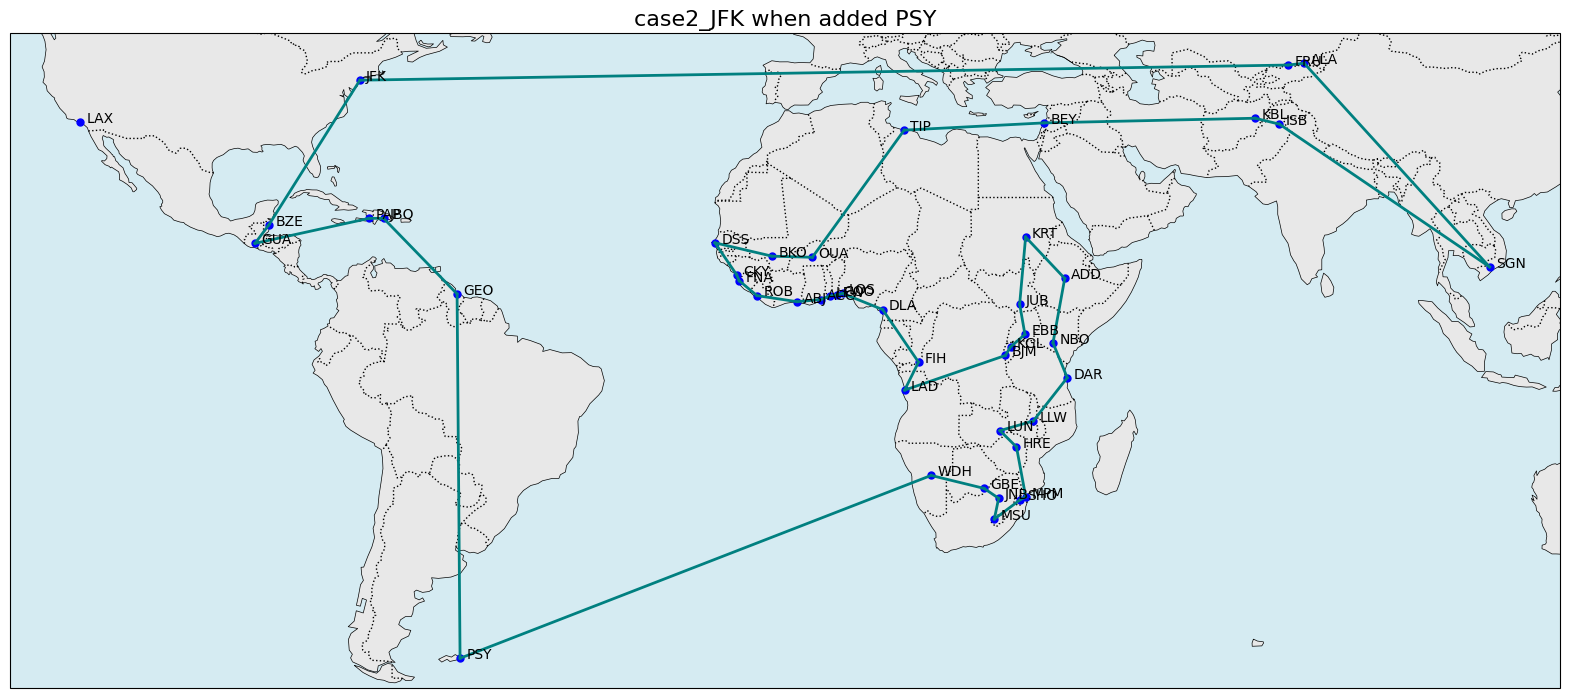

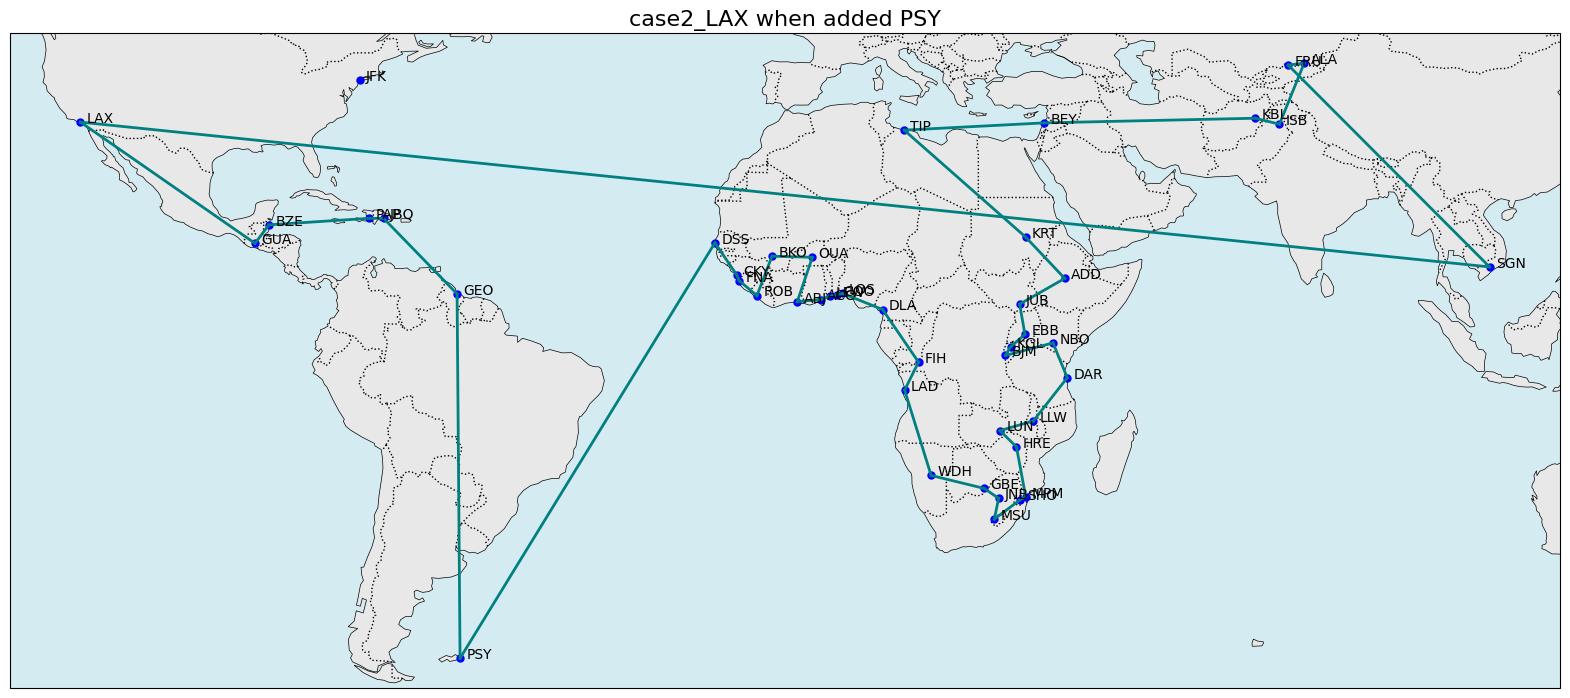

In [2]:
from util import plot_on_map_one_plane

plot_on_map(optimized_edges,data,title="two plane when added PSY")
plot_on_map_one_plane(case2_JFK_edges,data,title="case2_JFK when added PSY")
plot_on_map_one_plane(case2_LAX_edges,data,title="case2_LAX when added PSY")

In Scenario 1, the optimal tour requires using two planes. This conclusion differs from the original problem. Additionally, we observe that the optimal tour changes dramatically when traveling between continents, but the optimal tour within Africa remains relatively stable.

## scenario 2  remove an existing country fromt the plan , for instance, Vietnam

In [3]:
data_scenario2 = pd.read_csv('airports.csv')

# Remove Vietnam from the dataset
data_scenario2 = data_scenario2[data_scenario2['country'] != 'Vietnam']

data_scenario2['Unnamed: 0'] = data_scenario2['Unnamed: 0'] + 1
optimized_edges,G=optimizer_case_1(data_scenario2,accuracy=0.1)

case2_JFK_edges,G=optimizer_case2_JFK_based(data_scenario2,accuracy=0.1)
case2_LAX_edges,G=optimizer_case2_LAX_based(data_scenario2,accuracy=0.1)

Set parameter MIPGap to value 0.1
Gurobi Optimizer version 11.0.0 build v11.0.0rc2 (win64 - Windows 11+.0 (22631.2))

CPU model: 11th Gen Intel(R) Core(TM) i7-11800H @ 2.30GHz, instruction set [SSE2|AVX|AVX2|AVX512]
Thread count: 8 physical cores, 16 logical processors, using up to 16 threads

Optimize a model with 3790 rows, 3872 columns and 25462 nonzeros
Model fingerprint: 0x0aa8d4ae
Variable types: 88 continuous, 3784 integer (3784 binary)
Coefficient statistics:
  Matrix range     [1e+00, 4e+01]
  Objective range  [6e+01, 1e+04]
  Bounds range     [1e+00, 4e+01]
  RHS range        [1e+00, 4e+01]
Presolve removed 174 rows and 176 columns
Presolve time: 0.02s
Presolved: 3616 rows, 3696 columns, 24612 nonzeros
Variable types: 84 continuous, 3612 integer (3612 binary)
Found heuristic solution: objective 146288.46842
Found heuristic solution: objective 135176.53974

Root relaxation: objective 2.344250e+04, 129 iterations, 0.00 seconds (0.00 work units)

    Nodes    |    Current Node  

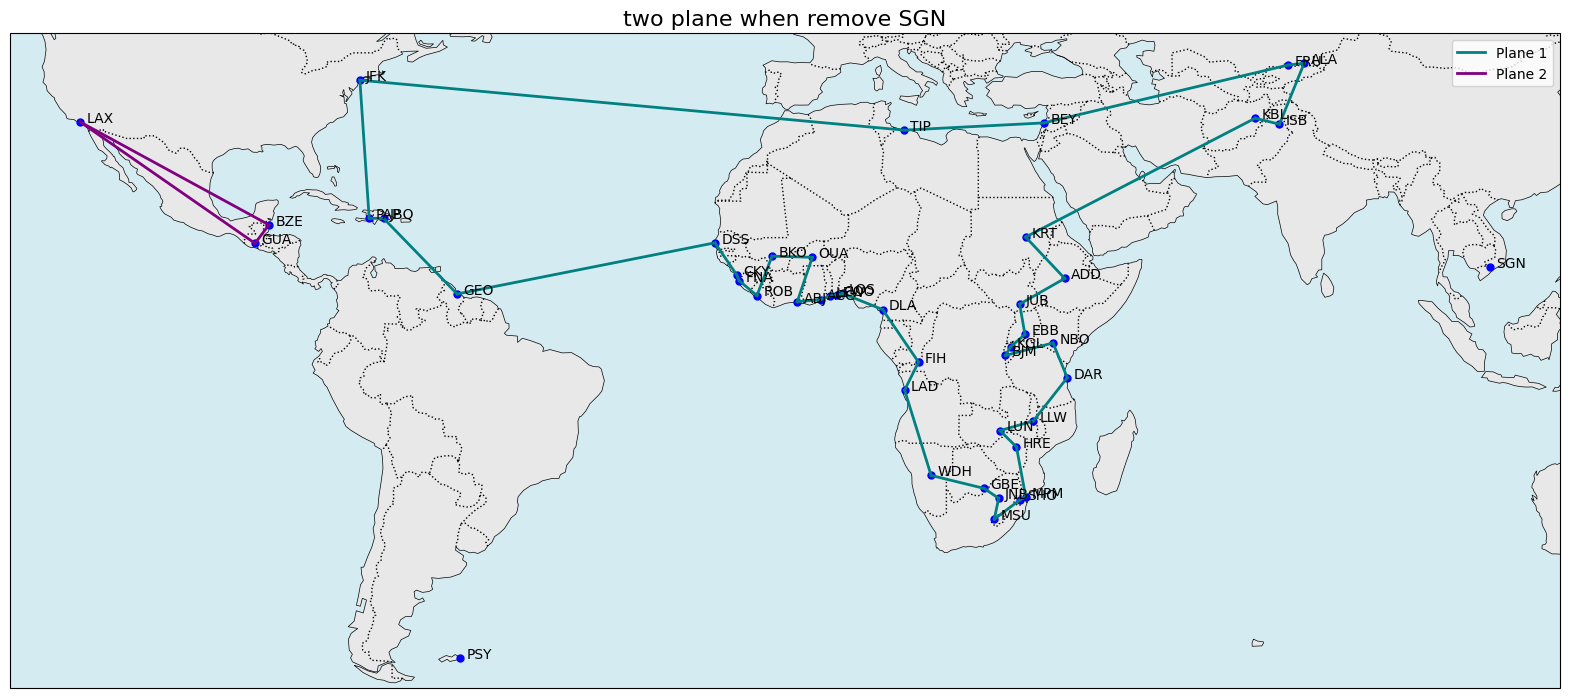

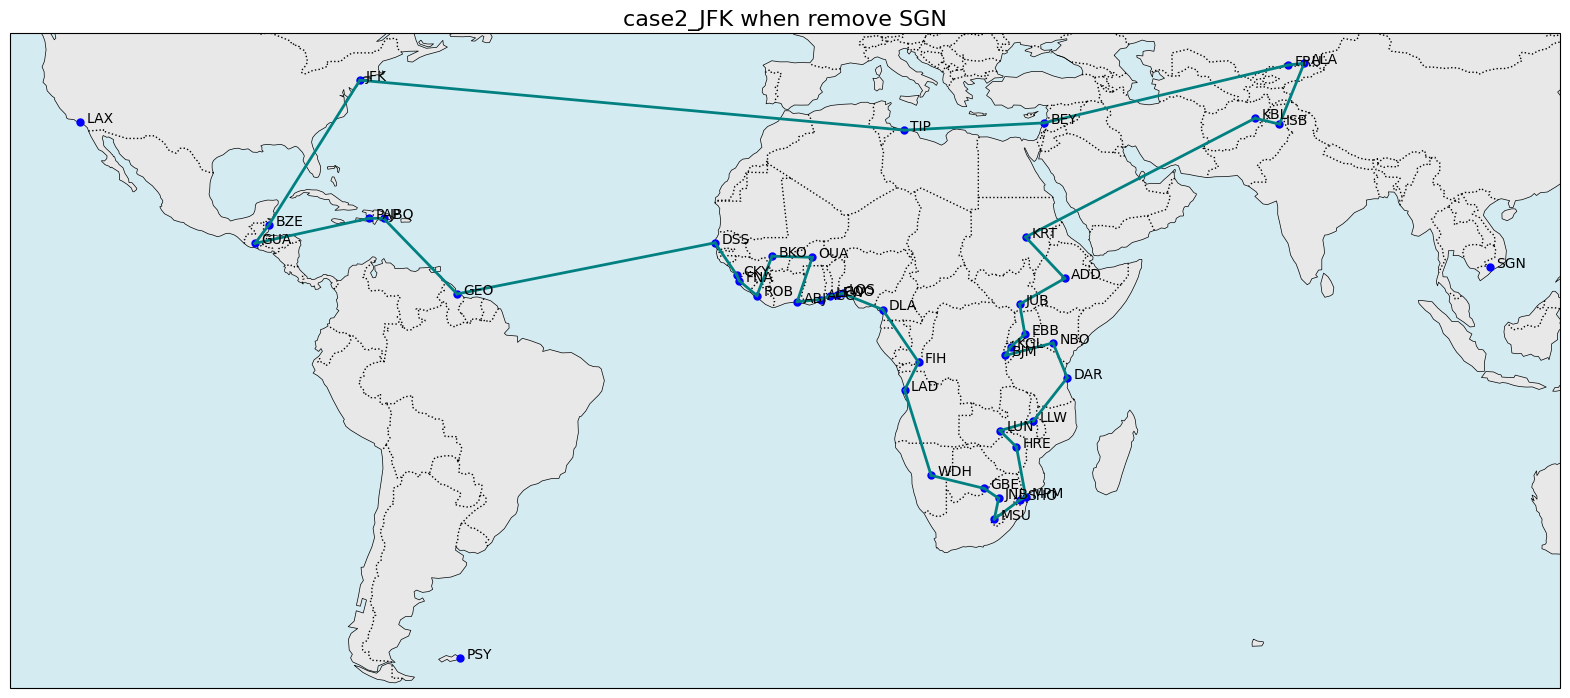

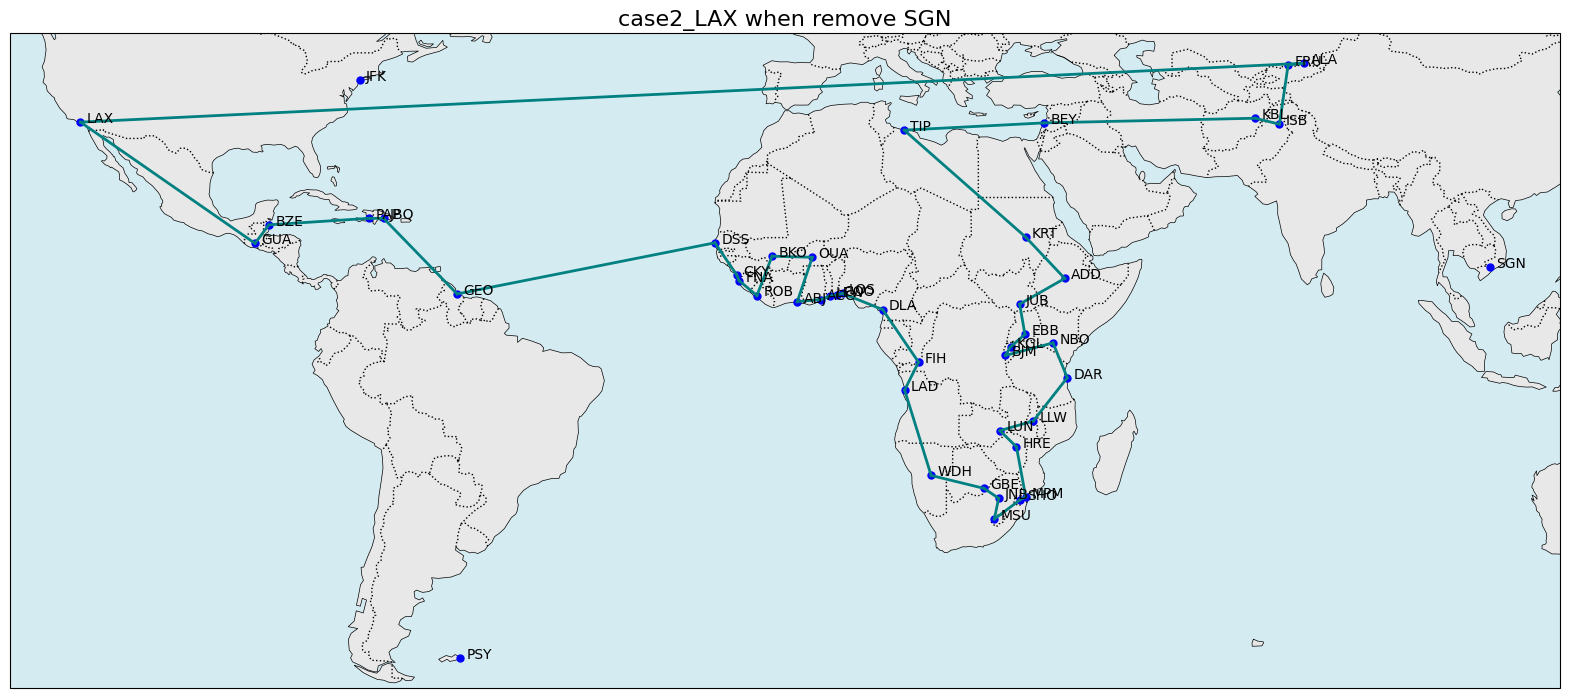

In [4]:
from util import plot_on_map_one_plane

plot_on_map(optimized_edges,data,title="two plane when remove SGN")
plot_on_map_one_plane(case2_JFK_edges,data,title="case2_JFK when remove SGN")
plot_on_map_one_plane(case2_LAX_edges,data,title="case2_LAX when remove SGN")

In Scenario 2, the optimal tour is the case2 when only one plane start from JFK